In [47]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict

X = pd.read_excel("heart.xlsx",sheet_name=0,header=0)
X = X.drop(X.columns[0], axis=1)
print(X.shape)

T = X.describe()  #on représente les statistiques descriptives
print(T)


(303, 14)
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860

In [48]:
print(X.mean()) 
print(X.var()) 

age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64
age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64


<Figure size 800x600 with 0 Axes>

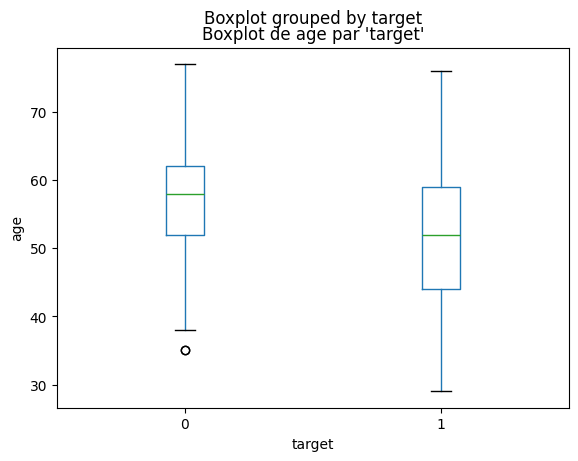

<Figure size 800x600 with 0 Axes>

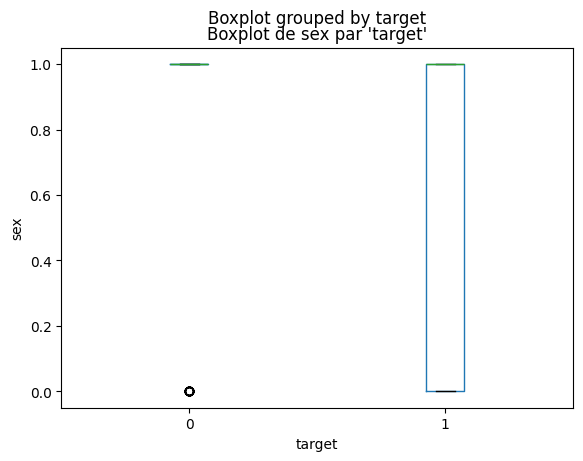

<Figure size 800x600 with 0 Axes>

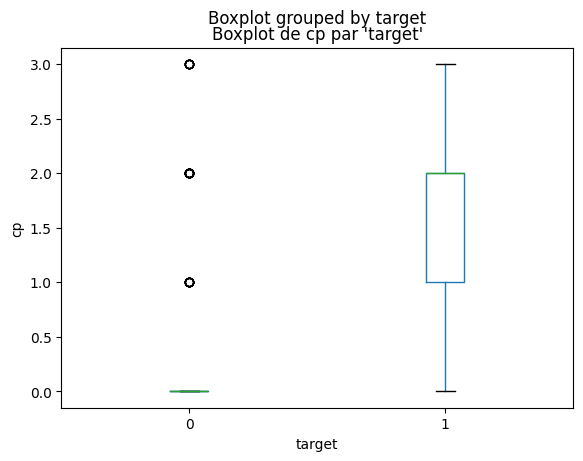

<Figure size 800x600 with 0 Axes>

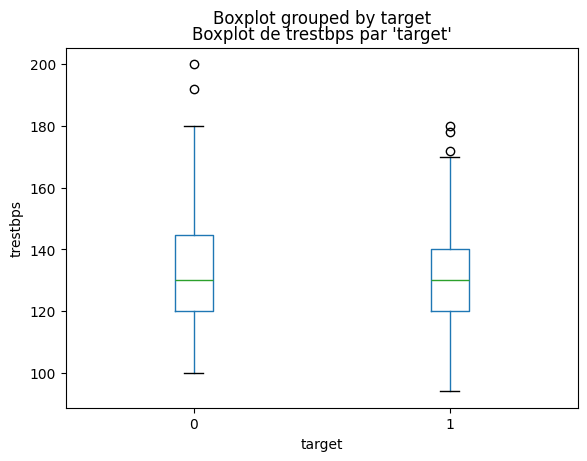

<Figure size 800x600 with 0 Axes>

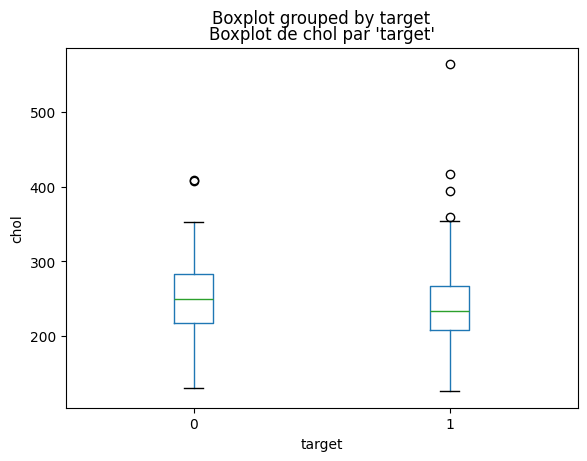

<Figure size 800x600 with 0 Axes>

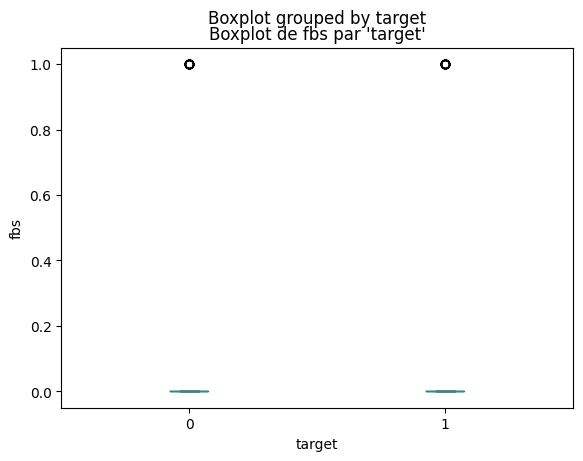

<Figure size 800x600 with 0 Axes>

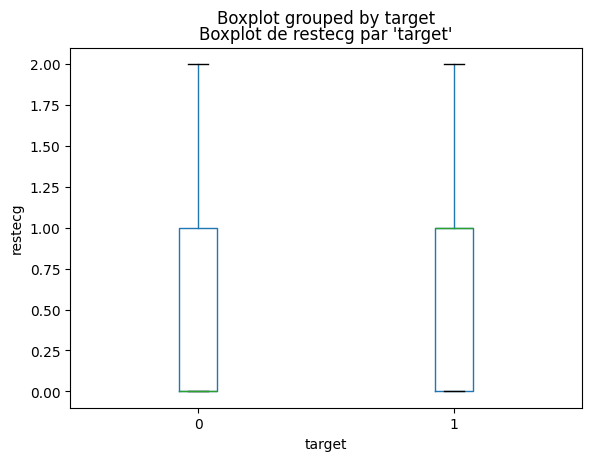

<Figure size 800x600 with 0 Axes>

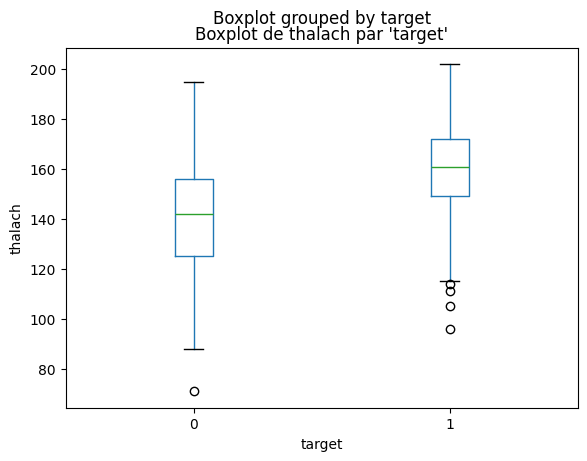

<Figure size 800x600 with 0 Axes>

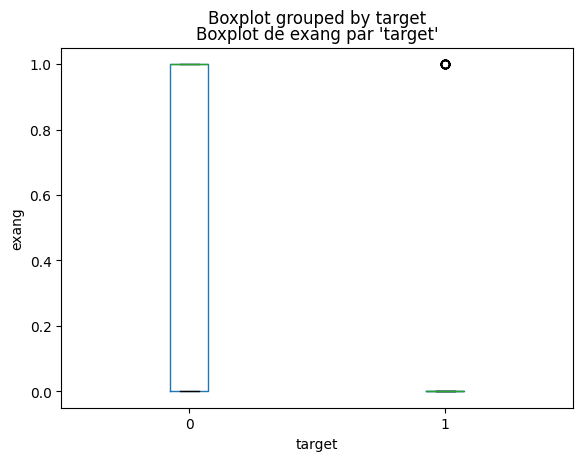

<Figure size 800x600 with 0 Axes>

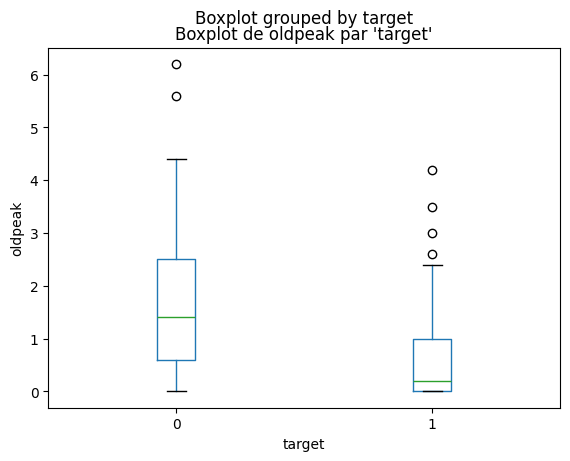

<Figure size 800x600 with 0 Axes>

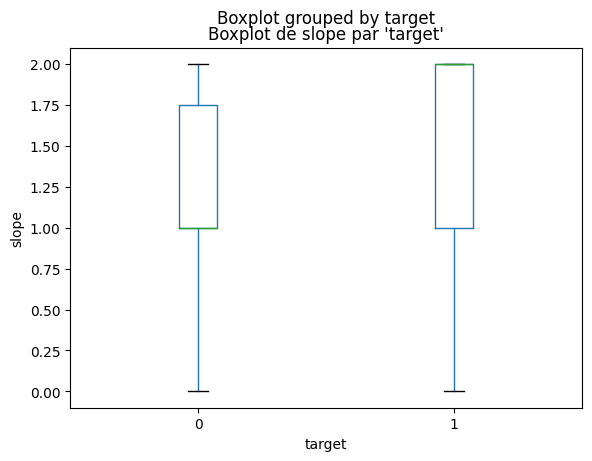

<Figure size 800x600 with 0 Axes>

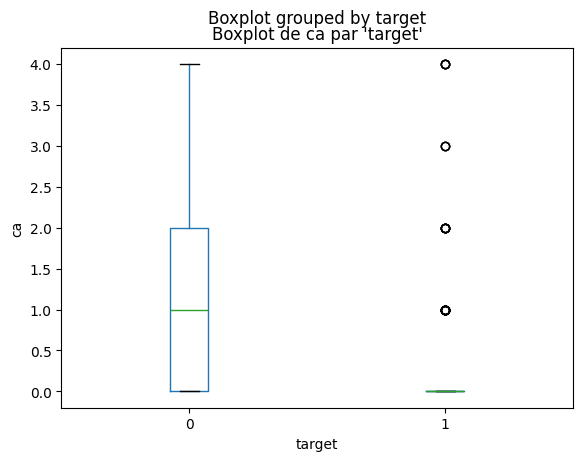

<Figure size 800x600 with 0 Axes>

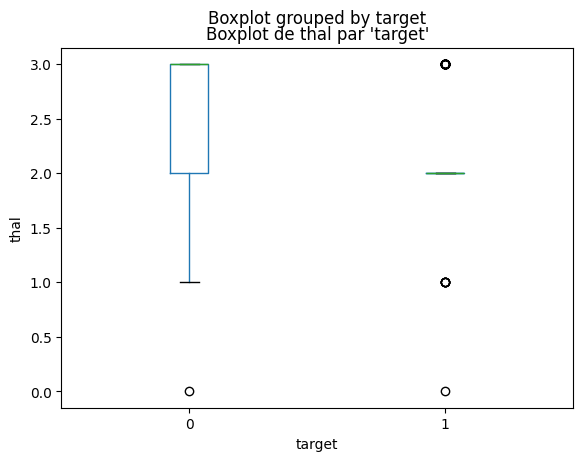

In [49]:
# Affichage des boxplots triés par 'target'
for column in X.columns[0:len(X.columns)-1]:  #on exclut la colonne 'target'
    plt.figure(figsize=(8, 6))
    X.boxplot(column=column, by='target', grid=False)
    plt.title(f"Boxplot de {column} par 'target'")
    plt.xlabel('target')
    plt.ylabel(column)
    plt.show()

plt.show()

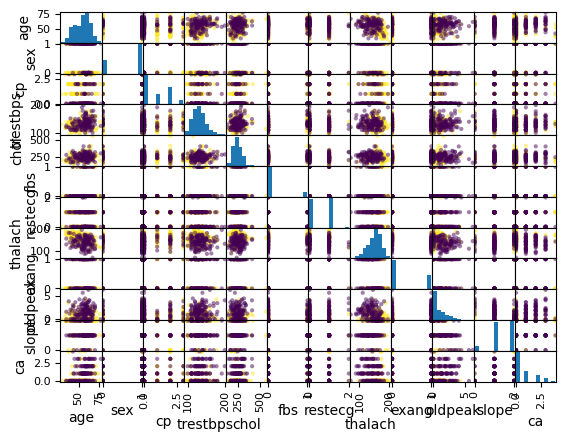

<Figure size 1500x1500 with 0 Axes>

In [50]:
X1 = X.copy()
le = LabelEncoder()

pd.plotting.scatter_matrix(X1.iloc[:,:-2], c=X1['target'])
plt.figure(figsize=(15, 15))
plt.show()  # Affiche les graphiques

On ne peut pas conclure de cette matrice

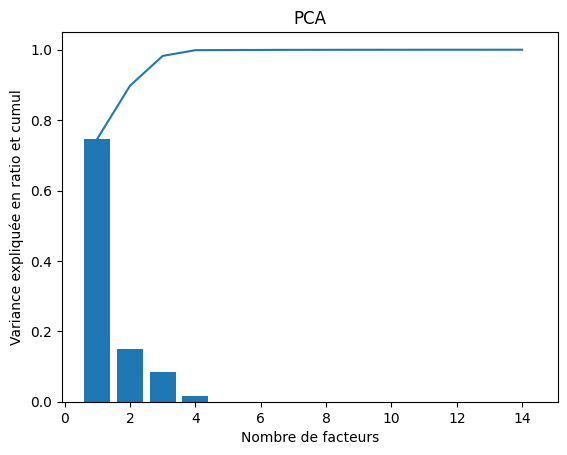

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

acp = PCA() 
Xacp = acp.fit_transform(X1) 
"""
scaler = StandardScaler()
Xacp = scaler.fit_transform(Xdf)     # on pourrait aussi faire (X1 - mean)/std (l'écart type)
Xacp = acp.fit_transform(Xacp)
"""
plt.figure() 
# Graphique des variances expliquées 
acp.explained_variance_     #Valeurs propres
acp.explained_variance_ratio_
acp.components_ #vecteurs propres


plt.bar(np.arange(1, len(acp.explained_variance_ratio_)+1), acp.explained_variance_ratio_) 
plt.plot(np.arange(1, len(acp.explained_variance_ratio_)+1), np.cumsum(acp.explained_variance_ratio_)) 
plt.ylabel("Variance expliquée en ratio et cumul") 
plt.xlabel("Nombre de facteurs") 
plt.title("PCA")
plt.show()

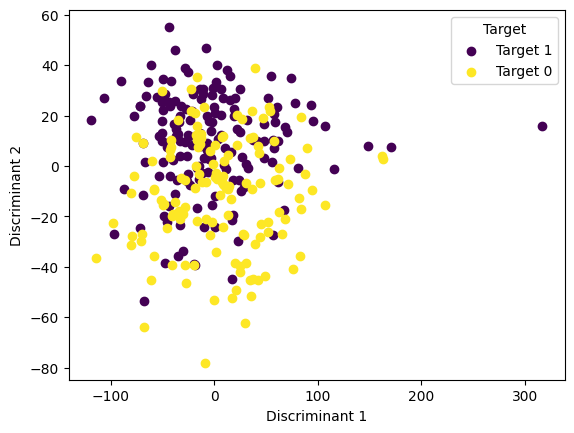

In [68]:
plt.figure()

# Création d'une palette de couleurs, juste esthétique
unique_codes = X1['target'].unique()
colors = cm.viridis(np.linspace(0, 1, len(unique_codes)))  # Génère des couleurs distinctes
color_map = dict(zip(unique_codes, colors))  # Associe chaque code à une couleur

# Tracé des points avec les couleurs correspondantes
for target in unique_codes:
    mask = X1['target'] == target
    plt.scatter(Xacp[mask, 0], Xacp[mask, 1], color=color_map[target], label=f'Target {target}')     #on sélectionne les composantes discriminantes 1 et 2

# Ajout des étiquettes et de la légende
plt.xlabel('Discriminant 1')
plt.ylabel('Discriminant 2')
plt.legend(title='Target')
plt.show()

Même si le pareto nous dit que deux composants discriminantes permettent de bien séparer target, en les visualisants on remarque que beaucoup de ces valeurs sont superposées.

ValueError: y should be a 1d array, got an array of shape (303, 14) instead.

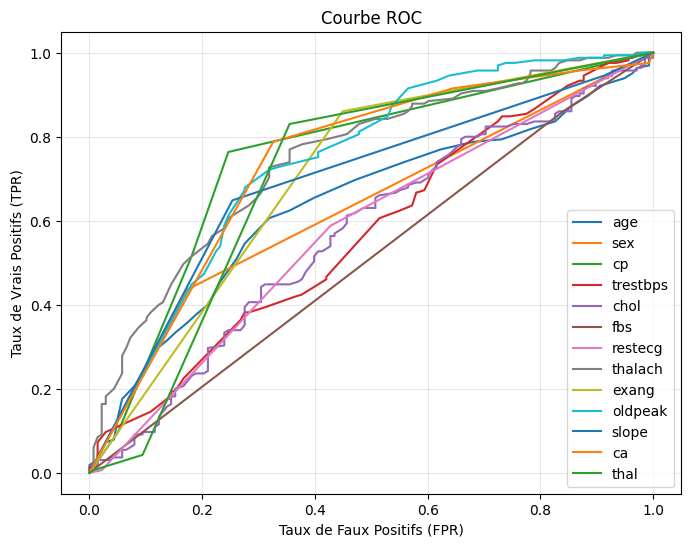

In [ ]:
#on va faire la courbe ROC avec roc_curve
plt.figure(figsize=(8, 6))
y_true = X1['target']
for i in range(13):
    y_score =  X1.iloc[:,i]
    auc = (roc_auc_score(y_true, y_score))
    #fpr, tpr, threshold = roc_curve(y_true, y_score, pos_label=1)
    
    if (auc > 0.5):
        fpr, tpr, threshold = roc_curve(y_true, y_score, pos_label=1)
    else:
        fpr, tpr, threshold = roc_curve(y_true, -y_score, pos_label=1)
    #print(auc)
    #pos_label =1 signifie que 1 est le label positif (non défectueux)
        
    # Tracé de la courbe ROC
    plt.plot(fpr, tpr, label = X1.columns[i])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)



#fpr, tpr, threshold = roc_curve(y_true, Xacp, pos_label=1)
#plt.plot(fpr, tpr, label = X1.columns[i])
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label='Hasard')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)

print("fpr : ")
print(fpr)
print("tpr : ")
print(tpr)
print("threshold : ")
print(threshold)

plt.show()
